In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
import math

In [ ]:
# square
points = [[4,4],[4,5],[4,6],[4,7],[4,8],[5,8],[6,8],[7,8],[8,8],
         [8,7],[8,6],[8,5],[8,4],[7,4],[6,4],[5,4]]

In [ ]:
# cross
points = [[6,6],[6,5],[6,4],[6,3],[6,7],[6,8],[6,9],
          [7,6],[8,6],[9,6],[5,6],[4,6],[3,6]]

In [ ]:
# points + cross + lines
points = [[4,4],[4,5],[4,6],[4,7],[4,8],[5,8],[6,8],[7,8],[8,8],
         [8,7],[8,6],[8,5],[8,4],[7,4],[6,4],[5,4],[6,6],[6,5],
          [6,4],[6,3],[6,7],[6,8],[6,9],[7,6],[8,6],[9,6],[5,6],
          [4,6],[3,6],[2,6],[1,6],[10,6],[11,6],[12,6],]

In [ ]:
# random
x = np.random.uniform(0,12,10)
y = np.random.uniform(0,12,10)
points = [i for i in zip(x,y)]

In [81]:
# triangles
points = [[3,3],[4,3],[5,3],[6,3],[7,3],[8,3],[7.5,4],[7,5],
         [6.5,6],[6,7],[3.5,4],[4,5],[4.5,6],[5,7],[5.5,8]]

# Functions

In [38]:
def deg2rad(deg):
    return deg*(np.pi/180)

def rotate(point,angle):
    origin = (0,0)
    angle = deg2rad(angle)
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

def deg2slope(deg):
    # if deg == 90, must add a little bit, otherwise this returns a slope of infinity
    if deg == 90:
        deg += 1/1e10
    return np.sin(deg2rad(deg))/np.cos(deg2rad(deg))

def reflect(point,angle):
    m = deg2slope(angle)
    d = (point[0] + (point[1]*m))/(1 + m**2)
    x1 = (2*d) - point[0]
    y1 = (2*d*m) - point[1]
    return (x1,y1)


# Parameters

In [83]:
size_stdev = 10
size_mean = 30
n = 14
rotation = 0
speed = 0.3

# Animations

<IPython.core.display.Javascript object>


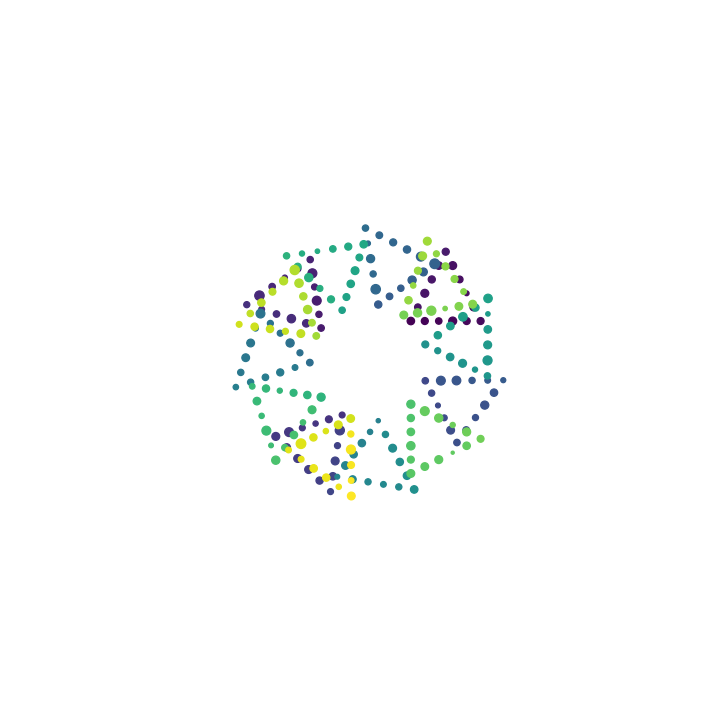

In [84]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)



def animate(i):
    global rotation
    rotation += speed
    reflected_points_x = []
    reflected_points_y = []
    for i in range(n):
        for j in points:
            x,y = rotate((j[0],j[1]),rotation*i)
            reflected_points_x.append(x)
            reflected_points_y.append(y)
    sizes = np.random.normal(size_mean,size_stdev,len(reflected_points_x))
    colors = np.linspace(0,1,len(reflected_points_x))
    ax.clear()

    ax.scatter(reflected_points_x,reflected_points_y,s=sizes,c=colors)
    plt.xlim((-20,20))
    plt.ylim((-20,20))

ani = animation.FuncAnimation(fig,animate,interval=1)
plt.show()